# Classification of Survived Passengers on Titanic Dataset
#### NAME: SASWAT SAMAL (http://saswatsamal.me/)

The 'titanic-train.csv' contains data of passenger details aboard the titanic, and whether they survived or not. We have to make a model which will predict their survival. The features are as follows:  

Survived - Survival (0 = No; 1 = Yes)  
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
Name - Name  
Sex - Sex  
Age - Age  
SibSp - Number of Siblings/Spouses Aboard  
Parch - Number of Parents/Children Aboard  
Ticket - Ticket Number  
Fare - Passenger Fare (British pound)  
Cabin - Cabin  
Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  

## Solve the following questions:
1. Based on logical reasoning, decide which variables are absolutely not required or relevant to the model. List them down and drop those columns. 
2. Plot a bar chart of the survived column. 
3. Plot a bar chart of the number of females who survived and not, and similarly males who survived and not. 
4. Plot a stacked bar chart of survived or not based on PClass(i.e how many survived and not for 1st, 2nd and 3rd class). The graph can be made by referring to https://matplotlib.org/examples/pylab_examples/bar_stacked.html
5. Check if there are missing values in any columns. Remove such rows in the dataset.  
6. Convert categorical values (if any) to numbers in the dataset.
7. Plot a heatmap of the correlation between all columns. There are columns are inter-related. Which are those colums? Can you drop either one of the inter-related column before proceeding ahead?
8. Now split your dataset into training & testing dataset with 80:20 ratio using train_test_split function. Use a random state which will give an approximately equal number of survived and non survived rows in the training test. Validate using a bar chart on the training dataset. 

## Decision Tree Modelling
#### Use a decision tree classifier with a maximum depth of 6, to train your model. Obtain the decision tree & confusion matrix for the predictions. Obtain the score of the model.



In [46]:
import pandas as pd
import numpy as np
import os

In [47]:
df_train = pd.read_csv("./data/titanic-train.csv")
df_train_1 = df_train.copy()
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df_test = pd.read_csv("./data/titanic-train.csv")
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
#df_train.describe()

In [50]:
#df_train.info()

In [51]:
df_train = df_train.drop(['Survived'],axis=1)
df_col = list(df_train.columns)
df_train_null = list(df_train.isnull().sum())
df_test_null = list(df_test.isnull().sum())

In [52]:
pclass = df_train["Pclass"].value_counts()
pclass

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
df_train = df_train_1

### Answers

1. Based on logical reasoning, decide which variables are absolutely not required or relevant to the model. List them down and drop those columns

In [64]:
df_train = df_train.drop(['Fare'], axis = 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1


2. Plot a bar chart of the survived column.

In [9]:
import matplotlib as plot
%matplotlib inline  
df = pd.read_csv("./data/titanic-train.csv")
def bar_chart(feature):
    survived = df_train[df_train['Survived']==1][feature].value_counts()
    not_survived = df_train[df_train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,not_survived])
    df.index=['Survived','Not_survived']
    df.plot(kind='bar',title=feature)

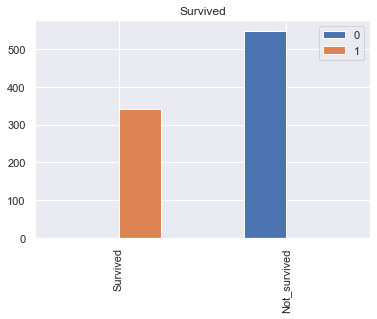

In [10]:
bar_chart('Survived')

3. Plot a bar chart of the number of females who survived and not, and similarly males who survived and not.

In [11]:
def bar_chart(feature):
    survived = df_train[df_train['Survived']==1][feature].value_counts()
    not_survived = df_train[df_train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,not_survived])
    df.index=['Survived','Not_survived']
    df.plot(kind='bar',title=feature)

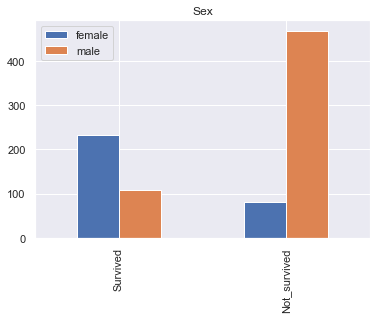

In [12]:
bar_chart('Sex')

4. Plot a stacked bar chart of survived or not based on PClass(i.e how many survived and not for 1st, 2nd and 3rd class). The graph can be made by referring to https://matplotlib.org/examples/pylab_examples/bar_stacked.html

In [13]:
def bar_chart(feature):
    survived = df_train[df_train['Survived']==1][feature].value_counts()
    not_survived = df_train[df_train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,not_survived])
    df.index=['Survived','Not_survived']
    df.plot(kind='bar',stacked=True,title=feature)

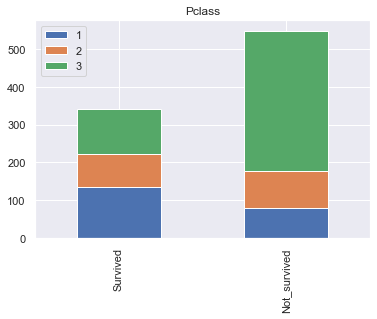

In [14]:
bar_chart('Pclass')

5. Check if there are missing values in any columns. Remove such rows in the dataset.

In [15]:
empty = pd.DataFrame(df_train, columns=['Age','SibSp','Parch','Cabin','Embarked'])
print(empty)

      Age  SibSp  Parch Cabin Embarked
0    22.0      1      0   NaN        S
1    38.0      1      0   C85        C
2    26.0      0      0   NaN        S
3    35.0      1      0  C123        S
4    35.0      0      0   NaN        S
..    ...    ...    ...   ...      ...
886  27.0      0      0   NaN        S
887  19.0      0      0   B42        S
888   NaN      1      2   NaN        S
889  26.0      0      0  C148        C
890  32.0      0      0   NaN        Q

[891 rows x 5 columns]


In [16]:
modified = empty.dropna()
print("Contents of the Modified Dataframe : ")
print(modified)

Contents of the Modified Dataframe : 
      Age  SibSp  Parch        Cabin Embarked
1    38.0      1      0          C85        C
3    35.0      1      0         C123        S
6    54.0      0      0          E46        S
10    4.0      1      1           G6        S
11   58.0      0      0         C103        S
..    ...    ...    ...          ...      ...
871  47.0      1      1          D35        S
872  33.0      0      0  B51 B53 B55        S
879  56.0      0      1          C50        C
887  19.0      0      0          B42        S
889  26.0      0      0         C148        C

[183 rows x 5 columns]


6. Convert categorical values (if any) to numbers in the dataset.

In [17]:
df["Embarked"]=df["Embarked"].replace({"C":"1","Q":"2","S":"3"})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1


7. Plot a heatmap of the correlation between all columns. There are columns are inter-related. Which are those colums? Can you drop either one of the inter-related column before proceeding ahead?

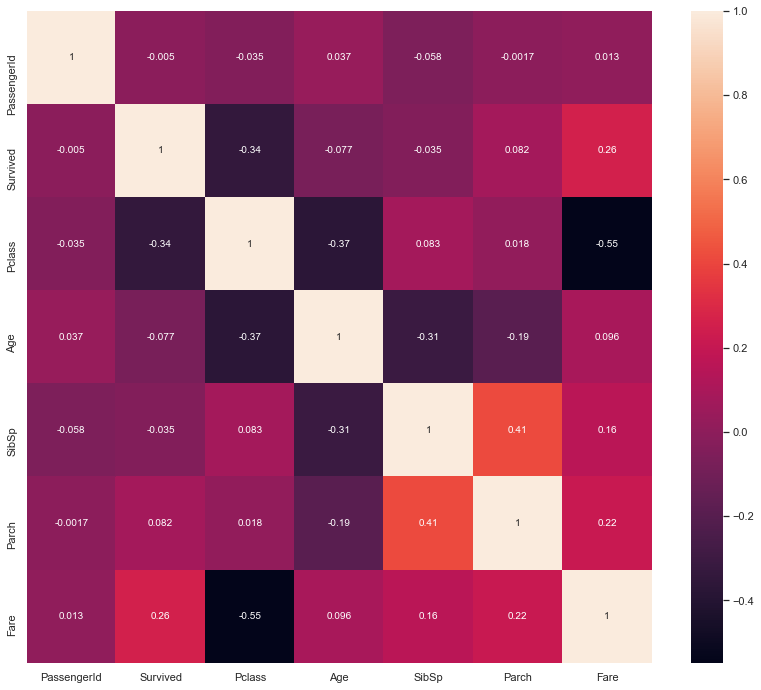

In [18]:
def titanic_corr(data):
    plt.figure(figsize=(14,12))
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True)
    
titanic_corr(df_train)

8. Now split your dataset into training & testing dataset with 80:20 ratio using train_test_split function. Use a random state which will give an approximately equal number of survived and non survived rows in the training test. Validate using a bar chart on the training dataset.

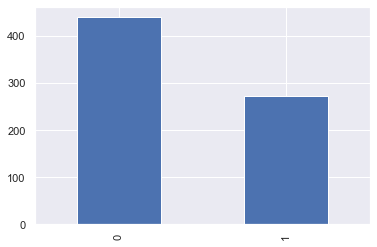

In [19]:
from sklearn.model_selection import train_test_split

all_X = df_train[df_col]
all_y = df_train['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(all_X,all_y,train_size=0.8,test_size =0.2,random_state=3)
Y_train.value_counts().plot(kind='bar')

Use a decision tree classifier with a maximum depth of 6, to train your model. Obtain the decision tree & confusion matrix for the predictions. Obtain the score of the model.

In [42]:
from io import StringIO
from sklearn.tree import DecisionTreeClassifier

import os
os.environ["PATH"]+= os.pathsep + "C:\\Program Files (x86)\\Graphviz2.38\\bin"

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image


decisiontree= DecisionTreeClassifier(criterion="entropy", max_depth=5)
obtained_tree= decisiontree.fit(df_train[["PassengerId","Pclass","SibSp","Parch"]],df_train["Survived"])

DecisionTreeImg= StringIO()

export_graphviz(obtained_tree, out_file= DecisionTreeImg,
               filled= True, rounded= True,
               feature_names=["PassengerId","Pclass","SibSp","Parch"],
               special_characters= True)

graph= pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
graph.set_size('"200,150!"')
Image(graph.create_png())


###### NAME: SASWAT SAMAL (http://saswatsamal.me/)